# Volatilidad en Bitcoin

Una alta volatilidad dificulta que bitcoin pueda ser utilizado como dinero, si definimos este como medio de cambio generalmente aceptado. Vamos a estudiar con los datos históricos del precio de BTC si se puede considerar un activo volátil y si está está disminuendo con el paso del tiempo.

Dentro de la comunidad bitcoiner hay dos líneas de opinión con respecto a la volatilidad del precio:

*   Una corriente que piensa que esta irá remitiendo con el tiempo a medida que aumente la adopción y disminuya su uso como activo financiero y creyendo que muchos de los inversores actuales son inmaduros y susceptibles a la emoción, miedo y euforia, con lo que provocan reacciones extremas en el mercado.

*   Otra que cree que la volatilidad es intrínsica a la oferta fija de bitcoin y que esa inelasticidad conlleva a que las variaciones entre la oferta y la demanda sean muy significativas y con ello las oscilaciones precio. Bitcoin no genera flujo de caja, por lo que los cambios de sentimiento influyen mucho más en el precio, que por ejemplo en el caso de una acción de una empresa. El hecho de que no se pueda aumentar la producción de bitcoin a ningún coste impide que haya una especulación que estabilice el precio.

# ¿Qué es la volatilidad?

La volatilidad de un activo es la variación del precio durante un período de tiempo determinado.
Una alta volatilidad se asocia con activos más riesgosos. 
En los mercados financieros tradicionales la volatilidad suele medirse en un período de 14 días, por lo tanto, la medida de la volatilidad para un día determinado se basa en la variación del rendimiento en los 13 días anteriores.

Para el cálculo de la volatilidad en bitcoin utilizamos el método clásico donde se toma la desviación estándar móvil de los cambios porcentuales del precio de BTC durante un período de tiempo determinado es decir se calcula el porcentaje de cambio en el precio día a día durante el periodo, posteriormente se calcula la media y cuanto se distancian los valores día a día de esa media (la desviación estándar).

# Evolución de la volatilidad en el precio de bitcoin

Vamos a estudiar como ha evolucionado la volatilidad de bitcoin a lo largo de la historia y si esta va a menos o a más con el paso del tiempo. 
También la compararemos con la volatilidad del precio del oro y del índice SP 500 para tener una idea de cuanta es la diferencia entre ellas.



In [2]:
 !pip install yfinance > /dev/null


The Python libraries that will be used in the study are the following.

In [3]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import yfinance as yf
from pylab import rcParams
import plotly.express as px
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Descarga de los datos de la cotización diaria de bitcoin de la web de Yahoo finance.

In [4]:
btc_data = yf.download('BTC-USD', interval = '1d')[['Close']]
#btc_data.head()

[*********************100%***********************]  1 of 1 completed


Cálculo de la desviación estándar en una ventana de 30 días.


In [5]:
volatility_days = 30
btc_data['pct_change'] = btc_data['Close'].pct_change()*100
btc_data['stdev'] = btc_data['pct_change'].rolling(volatility_days).std()

Para convertir la volatilidad de una medida a corto plazo a una métrica a largo plazo, se suele realiza una multiplicación de la medida por un factor que es la raíz cuadrada del numero total de períodos de negociación del activo en el periodo interesado por ejemplo si queremos anualizarla y como Bitcoin opera las 24 horas del día, los 7 días de la semana, los 365 días del año, tenemos que multiplica por np.sqrt(365), que es diferente a de los activos tradicionales donde se usa el valor de 260 ya que hay 260 días de negociación de acciones por año.


In [6]:
# Annualizing the standard deviation
btc_data['vol'] = btc_data['stdev']*(365**0.5)
btc_data.dropna(inplace=True)
btc_data.head()

,Close,pct_change,stdev,vol
Date,,,,
2014-10-17,383.757996,0.314201,3.914807,74.792279
2014-10-18,391.441986,2.002301,3.728975,71.241968
2014-10-19,389.545990,-0.484362,3.503313,66.930710
2014-10-20,382.845001,-1.720205,3.450811,65.927651
2014-10-21,386.475006,0.948166,3.428424,65.499950


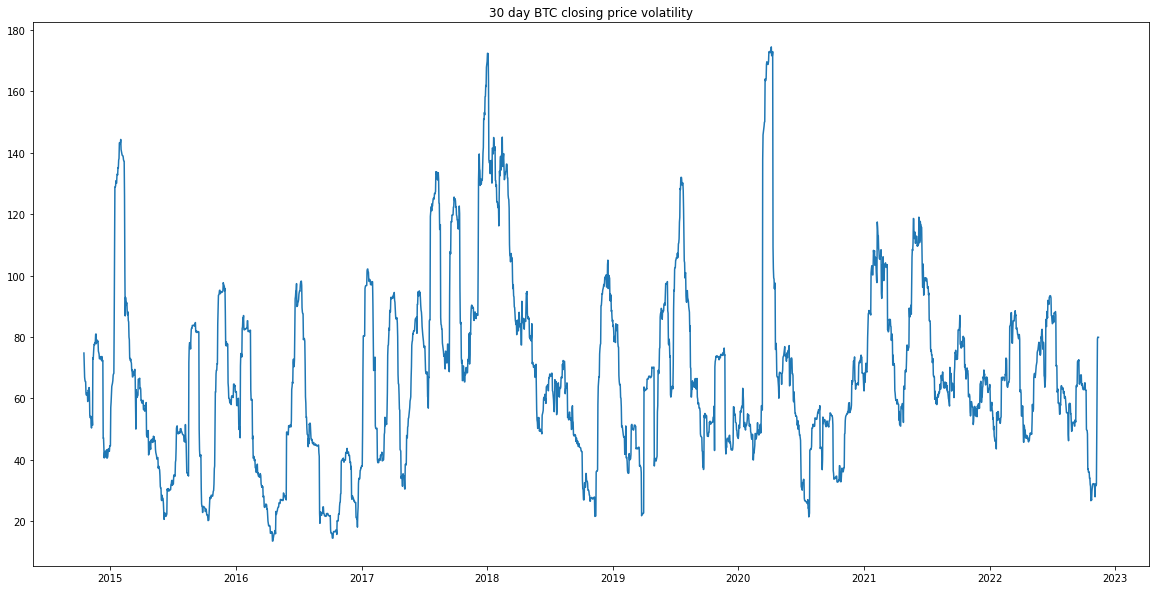

In [7]:
plt.figure(figsize=(20,10))
plt.title(str(volatility_days) + ' day BTC closing price volatility')
plt.plot(btc_data.vol)

El porcentaje de como ha cambiado el precio de cierre de BTC de un día para otro.

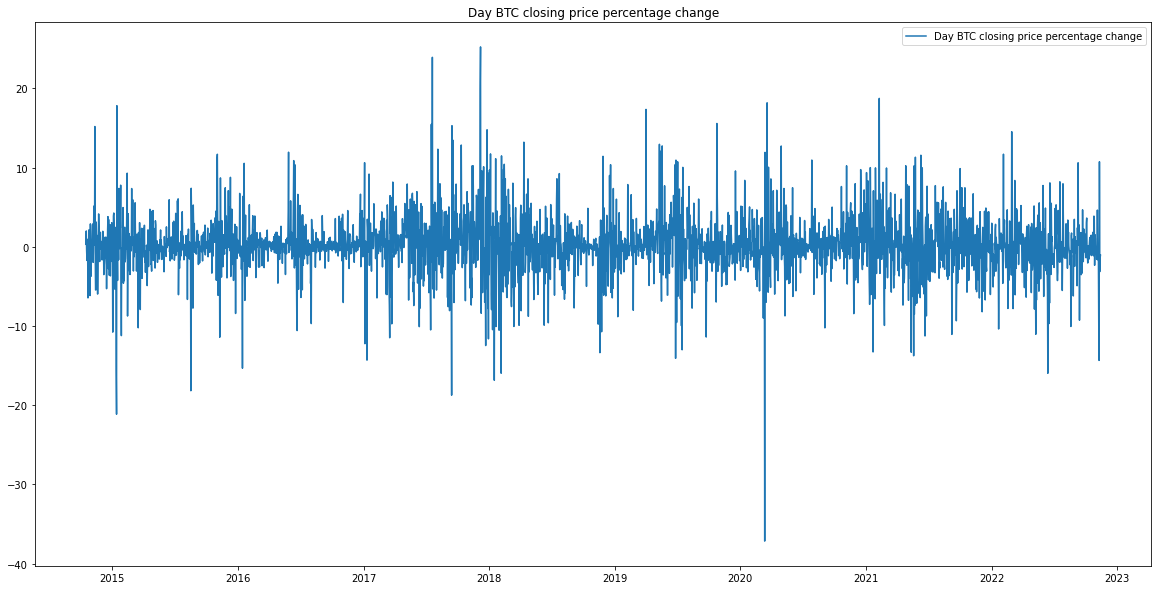

In [8]:
plt.figure(figsize=(20,10))
plt.title('Day BTC closing price percentage change')
plt.plot(btc_data['pct_change'], label='Day BTC closing price percentage change')
plt.legend()

Al hacer un ajuste lineal de los valores de la volatilidad de BTC desde octubre del 2014 se observa que la recta está cercana a la horizontal por lo que indica que no hay un decrecimiento de la volatilidad con el tiempo sino que hasta la fecha la volatilidad se ha mantenido e incluso ha aumentado ligeramente. 

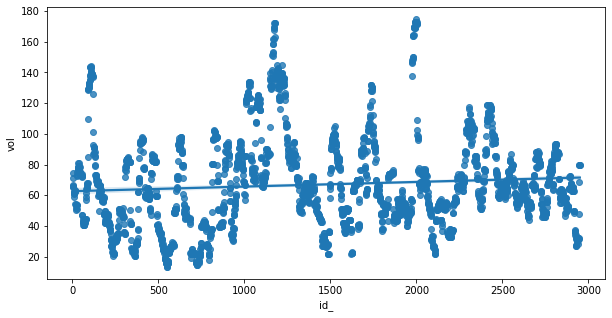

In [9]:
btc_data['id_'] = range(1, 1+len(btc_data))
sns.regplot(btc_data.id_, btc_data.vol)

Descarga de los datos del precio del oro y del índice SP500 de la web de Yahoo finance.

In [10]:
gold_data = yf.download('GC=F', start=btc_data.index[0])[['Close']]
gold_data['pct_change'] = gold_data.pct_change()*100
gold_data['stdev'] = gold_data['pct_change'].rolling(volatility_days).std()
gold_data['vol'] = gold_data['stdev']*(252**0.5)
gold_data.dropna(inplace=True)

SP500_data = yf.download('^GSPC', start=btc_data.index[0])[['Close']]
SP500_data['pct_change'] = SP500_data.pct_change()*100
SP500_data['stdev'] = SP500_data['pct_change'].rolling(volatility_days).std()
SP500_data['vol'] = SP500_data['stdev']*(252**0.5)
SP500_data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


La media de la volatilidad de bitcoin a lo largo del periodo estudiado es más de cuatro veces que la del oro y la del índice SP 500.
La alta volatilidad de bitcoin lo hace que sea muy difícil que sea usado como dinero, entendiendo este como un medio de intercambio generalmente aceptado, ya que para los vendedores les supone una gran incertidumbre, ya que si posteriormente a la venta de sus productos el precio baja de forma abrupta puede suponer que no tengan beneficios o incluso pérdidas, si por el contrario el precio sube sustancialmente sus beneficios se dispararán.

In [11]:
print("Bitcoin and SP500 volatility ratio: " + str(round(100 * btc_data['vol'].mean() / SP500_data['vol'].mean(),0)) + "%")
print("Bitcoin and gold volatility ratio: " + str(round(100 * btc_data['vol'].mean() / gold_data['vol'].mean(),0)) + "%")

Bitcoin SP500 volatility ratio: 434.0%
Bitcoin gold volatility ratio: 475.0%


Gráfica con la comparativa entre la volatilidad de bitcoin con la del precio del oro y la del índice SP500.

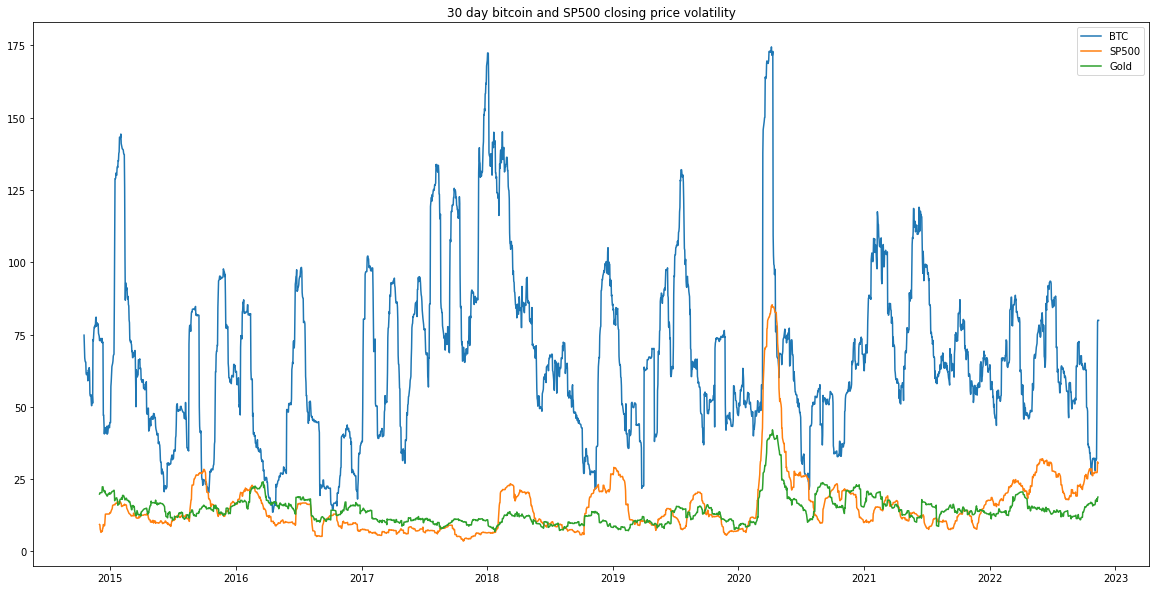

In [13]:
plt.figure(figsize=(20,10))
plt.title(str(volatility_days) + ' day bitcoin and SP500 closing price volatility')
plt.plot(btc_data.vol, label='BTC')
plt.plot(SP500_data.vol, label='SP500')
plt.plot(gold_data.vol, label='Gold')
plt.legend()
plt.show()

# Conclusiones

*   Bitcoin es un activo digital muy volátil, para hacernos una idea de ello es 4 veces más volátil que el oro y que el índice SP500.

*   Esta volatilidad en el periodo estudiado desde febrero del año 2014 hasta la actualidad no parece estar reduciéndose sino que se mantiene más o menos estable.

*   La información que nos trasmiten los datos es que la corriente que mantiene que la volatilidad del precio de bitcoin como algo intrínseco y que aboga porque no se reducirá con el paso del tiempo sería la que estaría en lo correcto.

*   La definición de dinero tendría tres patas, medio de intercambio generalmente aceptado, unidad de cuenta y reserva de valor. Si la volatilidad continua así, va a ser difícil que bitcoin sea utilizado como medio de intercambio ya que la variabilidad en el precio hace que ni vendedores ni compradores les interese utilizarlo para sus intercambios diarios y sin tener esa propiedad es muy complicado que pueda convertirse en una unidad de cuenta, por lo que no podría se considerado dinero.

*   Que no se pueda considerar dinero no significa que no tenga otros usos financieros, hasta la fecha ha sido una muy buena reserva de valor a medio y largo plazo, ya que la progresión en el precio ha sido meteórica, también permite que sean los propios usuarios los poseedores del activo y no que estos sean custodiados por los bancos u otros organismos y la no existencia de intermediarios hace que no existe ninguna limitación a la hora de adquirir y vender BTC.